# Assessment (AT)

### Questão 2
Considere o breast cancer dataset:
1. Identifique as features contínuas deste dataset.
2. Selecione duas features contínuas do dataset e realize a discretização dessas variáveis por meio de quantização por bins fixos. Apresente os resultados.
3. Selecione duas features contínuas do dataset (podem ser as mesmas do item (2)) e realize a discretização dessas variáveis por meio de quantização por bins variáveis. Apresente os resultados.

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
features = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# (a) Listar as features para identificar as variáveis contínuas
print("3 primeiros dados de cada feature:")
print(features.head(3))

# (b) Selecionando as variáveis "mean compactness" e "mean symmetry" para
#     separar por bins fixos
df = pd.DataFrame()
df["mean compactness bin"] = pd.cut(features["mean compactness"], bins=5, labels=False)
df["mean symmetry bin"] = pd.cut(features["mean symmetry"], bins=5, labels=False)
print("\ndiscretização de duas feature contínuas por bins fixos:")
print(df.head())

# (c) Realizando discretização por meio de quantização por bins variáveis, isto é,
#     colocar a mesma quantidade de amostras em cada bin
df = pd.DataFrame()
df["mean compactness qcut"] = pd.qcut(features["mean compactness"], q=5, labels=False)
df["mean symmetry qcut"] = pd.qcut(features["mean symmetry"], q=5, labels=False)
print("\ndiscretização de duas feature contínuas por bins variáveis:")
print(df.head())


3 primeiros dados de cada feature:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   worst area  worst smoothness  worst

### Questão 3
Considere o breast cancer dataset:
1. Defina uma função personalizada que realize uma normalização nas features do dataset usando FunctionTransformer do sklearn. Apresente os resultados obtidos.
2. Utilize o PowerTransform para normalizar as features do dataset. Apresente os resultados obtidos.

In [2]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# (a) Criado função para normalização das features e aplicado o FunctionTransformer
def normalize(features): # função para normalização das features
    return (features - features.min()) / (features.max() - features.min())

normalizer = FunctionTransformer(normalize)
feature_normalized = normalizer.fit_transform(features)
print("3 primeiros dados de cada feature normalizada com FunctionTransformer:") # mostrar resultados
print(feature_normalized.head(3))

# (b) Utilizado PowerTransformer para normalizar as features
power_transf = PowerTransformer()
feature_power = power_transf.fit_transform(features)
feature_power = pd.DataFrame(feature_power, columns=features.columns)
print("3 primeiros dados de cada feature normalizada com PowerTransform:") # mostrar resultados
print(feature_power.head(3))


3 primeiros dados de cada feature normalizada com FunctionTransformer:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.605518  ...      0.620776       0.141525         0.668310   
1                0.141323  ...      0.606901       0.303571         0.539818   
2                0.211247  ...      0.556386       0.360075         0.508442   

  

### Questão 4
Considere o breast cancer dataset:
1. Faça uma normalização das features do dataset usando o MinMaxScaler. Apresente os resultados obtidos.
2. Faça o escalonamento padrão das features do dataset usando o StandardScaler. Apresente os resultados obtidos.
3. Faça a regularização das features do dataset usando a norma L2. Apresente os resultados obtidos.
4. É possível aplicar simultaneamente dois ou mesmo os três métodos dos itens anteriores? Explique.

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# (a) Features normalizadas utilizando MinMaxScaler
minmax_scaler = MinMaxScaler()
feature_scaler = minmax_scaler.fit_transform(features)
feature_scaler = pd.DataFrame(feature_scaler, columns=features.columns)
print("3 primeiros dados de cada feature normalizada com MinMaxScaler:") # mostrar resultados
print(feature_scaler.head(3))

# (b) Features escalonadas utilizando StandardScaler
std_scaler = StandardScaler()
feature_std_scaler = std_scaler.fit_transform(features)
feature_std_scaler = pd.DataFrame(feature_std_scaler, columns=features.columns)
print("3 primeiros dados de cada feature normalizada com StandardScaler:") # mostrar resultados
print(feature_std_scaler.head(3))

# (c) Features regularizadas utilizando a norma L2
normalizer = Normalizer(norm="l2")
feature_l2 = normalizer.fit_transform(features)
feature_l2 = pd.DataFrame(feature_l2, columns=features.columns)
print("3 primeiros dados de cada feature normalizada com Normalizer (L2):") # mostrar resultados
print(feature_l2.head(3))


3 primeiros dados de cada feature normalizada com MinMaxScaler:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.605518  ...      0.620776       0.141525         0.668310   
1                0.141323  ...      0.606901       0.303571         0.539818   
2                0.211247  ...      0.556386       0.360075         0.508442   

   worst 

### Questão 5
Considere o Large Movie Review Dataset:
1. Remova as stopwords das resenhas do dataset.
2. Realize o stemming das expressões contidas nas features resultantes da operação realizada no item (1).
3. Realize a lemmatization das expressões contidas nas features resultantes da operação realizada no item (1)
4. Utilize a técnica de Bag-of-Words para vetorizar as resenhas do dataset resultante das operações do item (2). Apresente os resultados obtidos.
5. Utilize a técnica de Bag-of-n-Grams, identificando bigrams, para vetorizar as resenhas do dataset resultante das operações do item (3). Apresente os resultados obtidos.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer

# Arquivo com os dados obtido de http://ai.stanford.edu/~amaas/data/sentiment/
# Descompactado na pasta local
movie_review_path = "aclImdb/train"

# Carregar os arquivos
movie_review = load_files(movie_review_path, categories=["pos", "neg"], encoding="utf-8", decode_error="replace")

# Definir features e target
features = movie_review.data
target = movie_review.target

# (a) Para remover stopwords utilizamos o TfidfVectorizer com o parametro stop_words="english"
vectorizer = TfidfVectorizer(max_features=100)
features_tfidf = vectorizer.fit_transform(features)
print("Palavras mais relevantes sem stopwords:", vectorizer.get_feature_names_out()[:20])

vectorizer = TfidfVectorizer(stop_words="english", max_features=100)
features_tfidf = vectorizer.fit_transform(features)
print("\nPalavras mais relevantes com stopwords:", vectorizer.get_feature_names_out()[:20])

# (d) Bag-of-Words
vectorizer = CountVectorizer(max_features=100)
features_bow = vectorizer.fit_transform(features)
print("\nFormato da matriz BoW:", features_bow.shape)
print("Palavras mais relevantes com Bag-of-Words:", vectorizer.get_feature_names_out()[:20])

# (e) Bag-of-n-Grams
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)
features_bigrams = vectorizer.fit_transform(features)
print("\nFormato da matriz Bag-of-Bigrams:", features_bigrams.shape)
print("Palavras mais relevantes com Bag-of-n-Grams:", vectorizer.get_feature_names_out()[:20])


Palavras mais relevantes sem stopwords: ['about' 'after' 'all' 'also' 'an' 'and' 'any' 'are' 'as' 'at' 'bad' 'be'
 'because' 'been' 'br' 'but' 'by' 'can' 'character' 'characters']

Palavras mais relevantes com stopwords: ['10' 'acting' 'action' 'actors' 'actually' 'away' 'bad' 'best' 'better'
 'big' 'bit' 'br' 'cast' 'character' 'characters' 'come' 'comedy' 'day'
 'did' 'didn']

Formato da matriz BoW: (25000, 100)
Palavras mais relevantes com Bag-of-Words: ['about' 'after' 'all' 'also' 'an' 'and' 'any' 'are' 'as' 'at' 'bad' 'be'
 'because' 'been' 'br' 'but' 'by' 'can' 'character' 'characters']

Formato da matriz Bag-of-Bigrams: (25000, 100)
Palavras mais relevantes com Bag-of-n-Grams: ['about the' 'all the' 'and his' 'and it' 'and that' 'and the' 'as the'
 'as well' 'at all' 'at least' 'at the' 'br br' 'br the' 'br this'
 'but it' 'but the' 'by the' 'film is' 'for the' 'from the']


### Questão 6
Considere o Large Movie Review Dataset:
1. Redimensione os dados do dataset pelo método term frequency–inverse document frequency (tf-idf). Apresente os resultados obtidos.
2. Crie um modelo de classificação baseado em regressão logística sobre a base redimensionada no item (1) e avalie os resultados obtidos.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Arquivo com os dados obtido de http://ai.stanford.edu/~amaas/data/sentiment/
# Descompactado na pasta local
movie_review_path = "aclImdb/train"

# Carregar os arquivos
movie_review = load_files(movie_review_path, categories=["pos", "neg"], encoding="utf-8", decode_error="replace")

# Definir features e target
features = movie_review.data
target = movie_review.target

# (a) TD-IDF das resenhas do Large Movie Review Dataset
vectorizer = TfidfVectorizer(stop_words="english", max_features=100)
features_tfidf = vectorizer.fit_transform(features)
print(f"TF-IDF (resenhas, palavras): {features_tfidf.shape}")
print("Palavras mais relevantes:", vectorizer.get_feature_names_out()[:20])

# (b) Modelo criado com uso de regressão logística
feature_train, feature_test, target_train, target_test = train_test_split(features_tfidf, target, test_size=0.2, random_state=11)
model = LogisticRegression(max_iter=1000)
model.fit(feature_train, target_train)
target_pred = model.predict(feature_test) # previsão
print("\nAcurácia:", accuracy_score(target_test, target_pred))

# A acurácia obtida com os parâmetros dados foi de 71.38%, ou seja, este percentual de resenhas foi classificado corretamente
# como positivas ou negativas

TF-IDF (resenhas, palavras): (25000, 100)
Palavras mais relevantes: ['10' 'acting' 'action' 'actors' 'actually' 'away' 'bad' 'best' 'better'
 'big' 'bit' 'br' 'cast' 'character' 'characters' 'come' 'comedy' 'day'
 'did' 'didn']

Acurácia: 0.7138


### Questão 7
Considere o powerlifting database:
1. Vetorize as variáveis categóricas usando One-hot Encoding. Apresente os resultados obtidos.
2. Vetorize as variáveis categóricas usando Dummy Coding. Compare os resultados desta vetorização com aqueles obtidos no item (1).
3. Vetorize as variáveis categóricas usando Effect Coding. Compare os resultados desta vetorização com aqueles obtidos nos itens (1) e (2).

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Carregar os arquivos
power_lifting = pd.read_csv("openpowerlifting.csv")

# (a) One-hot Encoding
cols = ["Sex", "Equipment"] # selecionado duas colunas categóricas
encoder = OneHotEncoder()
encoded = encoder.fit_transform(power_lifting[cols])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(cols))
print("One-hot Encoding:")
print(encoded_df.head())

# (b) Dummy Coding: remove a primeira coluna de cada categoria
encoder = OneHotEncoder(drop="first")
encoded = encoder.fit_transform(power_lifting[cols])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(cols))
print("\nDummy Coding: remove a primeira coluna de cada categoria")
print(encoded_df.head())


One-hot Encoding:
   Sex_F  Sex_M  Equipment_Multi-ply  Equipment_Raw  Equipment_Single-ply  \
0    1.0    0.0                  0.0            0.0                   0.0   
1    1.0    0.0                  0.0            0.0                   1.0   
2    1.0    0.0                  0.0            0.0                   1.0   
3    1.0    0.0                  0.0            1.0                   0.0   
4    1.0    0.0                  0.0            1.0                   0.0   

   Equipment_Straps  Equipment_Wraps  
0               0.0              1.0  
1               0.0              0.0  
2               0.0              0.0  
3               0.0              0.0  
4               0.0              0.0  

Dummy Coding: remove a primeira coluna de cada categoria
   Sex_M  Equipment_Raw  Equipment_Single-ply  Equipment_Straps  \
0    0.0            0.0                   0.0               0.0   
1    0.0            0.0                   1.0               0.0   
2    0.0            0.0   

### Questão 8
Explique com suas palavras quais são as vantagens e as desvantagens de se realizar a vetorização de variáveis categóricas de um dataset.
<br><br>
Considere ainda o powerlifting database:
1. Compacte as features categóricas da base de dados usando Feature Hashing.
2. Compacte as features categóricas da base de dados usando Bin Counting.
3. Analise os resultados obtidos no itens (1) e (2).

In [7]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction import DictVectorizer

power_lifting = pd.read_csv("openpowerlifting.csv")
cols = ["Sex", "Equipment"] # selecionado duas colunas categóricas

# (a) Compactando feaures utilizando Feature Hashing
power_lifting_dict = power_lifting[cols].astype(str).to_dict(orient="records")
hasher = FeatureHasher(n_features=7, input_type="dict") 
hash_features = hasher.fit_transform(power_lifting_dict)
hash_df = pd.DataFrame(hash_features.toarray())
print("Feature Hashing")
print(hash_df.head())

# (b) Compactando features utilizando Bin Counting
power_lifting_dict = power_lifting[cols].astype(str).to_dict(orient="records")
vectorizer = DictVectorizer(sparse=False)
bin_count_features = vectorizer.fit_transform(power_lifting_dict)
bin_count_df = pd.DataFrame(bin_count_features, columns=vectorizer.get_feature_names_out())
print("\nBin Counting")
print(bin_count_df.head())

Feature Hashing
     0    1    2    3    4    5    6
0  0.0  0.0  0.0  1.0  0.0  0.0  1.0
1  0.0  0.0  1.0  0.0  0.0  0.0  1.0
2  0.0  0.0  1.0  0.0  0.0  0.0  1.0
3  0.0  0.0  1.0  0.0  0.0  0.0  1.0
4  0.0  0.0  1.0  0.0  0.0  0.0  1.0

Bin Counting
   Equipment=Multi-ply  Equipment=Raw  Equipment=Single-ply  Equipment=Straps  \
0                  0.0            0.0                   0.0               0.0   
1                  0.0            0.0                   1.0               0.0   
2                  0.0            0.0                   1.0               0.0   
3                  0.0            1.0                   0.0               0.0   
4                  0.0            1.0                   0.0               0.0   

   Equipment=Wraps  Sex=F  Sex=M  
0              1.0    1.0    0.0  
1              0.0    1.0    0.0  
2              0.0    1.0    0.0  
3              0.0    1.0    0.0  
4              0.0    1.0    0.0  


### Questão 10
Considere o Lung Cancer Prediction Dataset:
1. Aplique o algoritmo de PCA e selecione as componentes mais relevantes. Apresente os resultados graficamente.


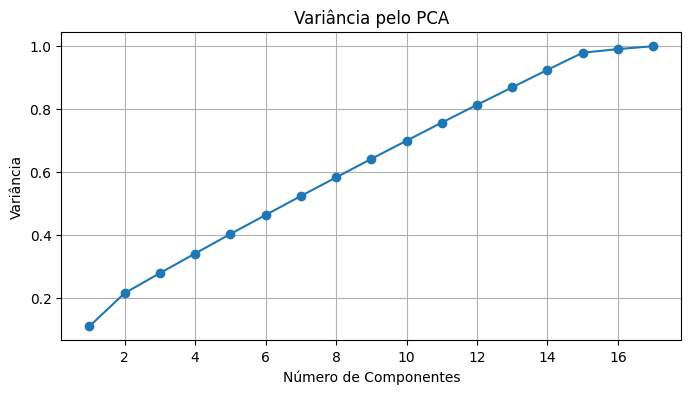

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Carregar os arquivos
lung_cancer = pd.read_csv("Lung Cancer Dataset.csv")

# Selecionar features numéricas
features = lung_cancer.select_dtypes(include=["int64", "float64"])

# Normalizar os dados
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA()
feature_pca = pca.fit_transform(feature_scaled)

# Gerar gráfico
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel("Número de Componentes")
plt.ylabel("Variância")
plt.title("Variância pelo PCA")
plt.grid(True)
plt.show()